In [1]:
import utils
import matplotlib.pyplot as plt

alerts, _ = utils.load_data()
alerts = utils.separate_coords(alerts)

alerts.head(3)

,country,city,reportRating,reportByMunicipalityUser,confidence,reliability,type,uuid,roadType,magvar,subtype,street,pubMillis,endreport,reportDescription,x,y,geometry
0,CI,Antofagasta,1,false,5,10,HAZARD,a123f22e-e5e0-4c6c-8a4e-7434c4fd2110,6,17,HAZARD_ON_ROAD_CONSTRUCTION,Av. República de Croacia,1724417637000,1.724425e+12,NaN,-70.412429,-23.676846,POINT (-7838275.742 -2714079.538)
1,CI,Antofagasta,0,false,0,5,JAM,1d8df954-e380-4327-8015-f4fbadf74f2d,6,4,JAM_HEAVY_TRAFFIC,Av. Edmundo Pérez Zujovic,1724423878000,1.724425e+12,NaN,-70.392283,-23.617475,POINT (-7836033.099 -2706864.568)
2,CI,Antofagasta,0,false,0,5,JAM,c53a5bc6-f6b6-44b8-a5bd-af69b60a4580,1,359,,Pasaje El Volcán,1724425406000,1.724425e+12,NaN,-70.385619,-23.573323,POINT (-7835291.266 -2701501.184)


In [2]:
accidents = utils.extract_event(alerts, 'ACCIDENT')
jams = utils.extract_event(alerts, 'JAM')
hazards = utils.extract_event(alerts, 'HAZARD')

In [3]:
print('Las 10 calles con más accidentes son:')
print(accidents['street'].value_counts().head(10))

Las 10 calles con más accidentes son:
street
Av. Edmundo Pérez Zujovic               82
Av. Pedro Aguirre Cerda                 63
Av. Grecia                              23
Nicolás Tirado                          18
Av. Iquique                             17
Av. Antonio Rendic                      14
Juan Bolívar                            12
Av. Balmaceda                           10
Circunvalación Padre Alberto Hurtado     8
Av. Argentina                            6
Name: count, dtype: int64


In [4]:
print('Las 10 calles con más atascos son:')
print(jams['street'].value_counts().head(10))

Las 10 calles con más atascos son:
street
Av. Edmundo Pérez Zujovic    919
Av. Pedro Aguirre Cerda      284
Av. Grecia                   232
Av. Iquique                  188
Av. Antonio Rendic           141
Av. Balmaceda                 91
Nicolás Tirado                68
Av. Óscar Bonilla             68
Av. Argentina                 66
Av. Séptimo de Línea          56
Name: count, dtype: int64


In [5]:
print('Las 10 calles con más peligros son:')
print(hazards['street'].value_counts().head(10))

Las 10 calles con más peligros son:
street
Av. Edmundo Pérez Zujovic               248
Av. Pedro Aguirre Cerda                  75
Av. Antonio Rendic                       74
Av. Argentina                            72
Av. Grecia                               63
Av. Séptimo de Línea                     58
Av. Balmaceda                            49
Av. Salvador Allende                     40
Av. Angamos                              33
Circunvalación Padre Alberto Hurtado     32
Name: count, dtype: int64


In [6]:
accidents['freq'] = utils.freq_nearby(accidents)

In [7]:
accidents = accidents[utils.filter_nearby(accidents)]
top10 = accidents[['street', 'freq', 'x', 'y', 'geometry']].sort_values('freq', ascending=False).head(10)

accidents10 = top10.copy()
top10


,street,freq,x,y,geometry
906,Nicolás Tirado,23,-70.388786,-23.591896,POINT (-7835643.815 -2703757.127)
130,Av. Edmundo Pérez Zujovic,16,-70.396341,-23.591243,POINT (-7836484.834 -2703677.806)
3494,Av. Edmundo Pérez Zujovic,13,-70.395854,-23.634842,POINT (-7836430.621 -2708974.728)
1764,Av. Pedro Aguirre Cerda,13,-70.390059,-23.586442,POINT (-7835785.525 -2703094.632)
2829,Av. Edmundo Pérez Zujovic,11,-70.393390,-23.584144,POINT (-7836156.33 -2702815.503)
1974,Bellavista,10,-70.394754,-23.637481,POINT (-7836308.17 -2709295.401)
1968,Av. Balmaceda,10,-70.401384,-23.646969,POINT (-7837046.218 -2710448.372)
5007,Av. Iquique,9,-70.394007,-23.629351,POINT (-7836225.014 -2708307.519)
96,Av. Edmundo Pérez Zujovic,8,-70.396410,-23.628191,POINT (-7836492.515 -2708166.572)
2107,Av. Pedro Aguirre Cerda,8,-70.390451,-23.582972,POINT (-7835829.162 -2702673.146)


In [8]:
print('Las 10 coordenadas con más accidentes son:')
for _, row in top10.iterrows():
    print(f'{row['y']}, {row['x']}')

Las 10 coordenadas con más accidentes son:
-23.591896, -70.388786
-23.591243, -70.396341
-23.634842, -70.395854
-23.586442, -70.390059
-23.584144, -70.39339
-23.637481, -70.394754
-23.646969, -70.401384
-23.629351, -70.394007
-23.628191, -70.39641
-23.582972, -70.390451


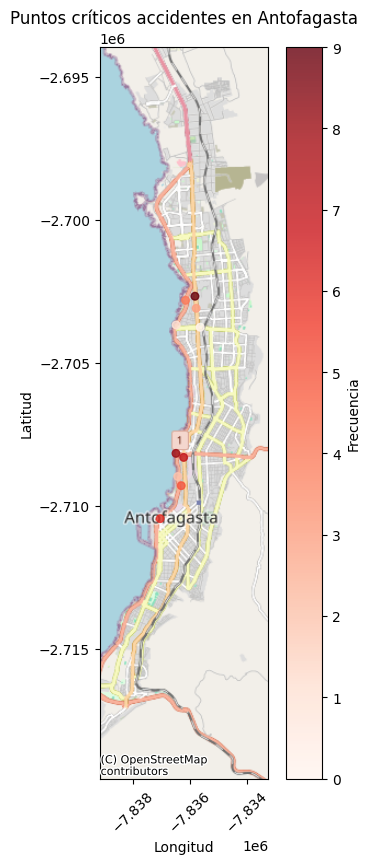

,street,freq,x,y,geometry
906,Nicolás Tirado,23,-70.388786,-23.591896,POINT (-7835643.815 -2703757.127)
130,Av. Edmundo Pérez Zujovic,16,-70.396341,-23.591243,POINT (-7836484.834 -2703677.806)
3494,Av. Edmundo Pérez Zujovic,13,-70.395854,-23.634842,POINT (-7836430.621 -2708974.728)
1764,Av. Pedro Aguirre Cerda,13,-70.390059,-23.586442,POINT (-7835785.525 -2703094.632)
2829,Av. Edmundo Pérez Zujovic,11,-70.393390,-23.584144,POINT (-7836156.33 -2702815.503)
1974,Bellavista,10,-70.394754,-23.637481,POINT (-7836308.17 -2709295.401)
1968,Av. Balmaceda,10,-70.401384,-23.646969,POINT (-7837046.218 -2710448.372)
5007,Av. Iquique,9,-70.394007,-23.629351,POINT (-7836225.014 -2708307.519)
96,Av. Edmundo Pérez Zujovic,8,-70.396410,-23.628191,POINT (-7836492.515 -2708166.572)
2107,Av. Pedro Aguirre Cerda,8,-70.390451,-23.582972,POINT (-7835829.162 -2702673.146)


In [9]:
MARKERSIZE = 30

fig, ax = utils.plot_map(accidents10, 'Puntos críticos accidentes en Antofagasta', markersize=MARKERSIZE, cmap='Reds')
plt.show(fig)
accidents10

In [10]:
jams['freq'] = utils.freq_nearby(jams)

In [11]:
jams = jams[utils.filter_nearby(jams)]

top10 = jams[['street', 'freq', 'x', 'y', 'geometry']].sort_values('freq', ascending=False).head(10)
jams10 = top10.copy()
top10

,street,freq,x,y,geometry
43,Av. Edmundo Pérez Zujovic,101,-70.395696,-23.633673,POINT (-7836413.033 -2708832.681)
139,Nicolás Tirado,88,-70.388978,-23.591899,POINT (-7835665.188 -2703757.492)
80,Av. Edmundo Pérez Zujovic,88,-70.394325,-23.622785,POINT (-7836260.414 -2707509.725)
174,Av. Edmundo Pérez Zujovic,80,-70.396247,-23.629337,POINT (-7836474.37 -2708305.818)
39,Av. Edmundo Pérez Zujovic,68,-70.395669,-23.636586,POINT (-7836410.027 -2709186.646)
55,Av. Edmundo Pérez Zujovic,67,-70.396441,-23.626434,POINT (-7836495.966 -2707953.087)
111,Av. Arturo Pérez Canto,66,-70.381019,-23.575661,POINT (-7834779.197 -2701785.148)
165,Av. Edmundo Pérez Zujovic,63,-70.394657,-23.588255,POINT (-7836297.372 -2703314.853)
60,Mejillones,61,-70.392389,-23.627195,POINT (-7836044.899 -2708045.552)
1,Av. Edmundo Pérez Zujovic,61,-70.392283,-23.617475,POINT (-7836033.099 -2706864.568)


(<Figure size 450x950 with 2 Axes>,
 <Axes: title={'center': 'Puntos críticos congestión en Antofagasta'}, xlabel='Longitud', ylabel='Latitud'>)

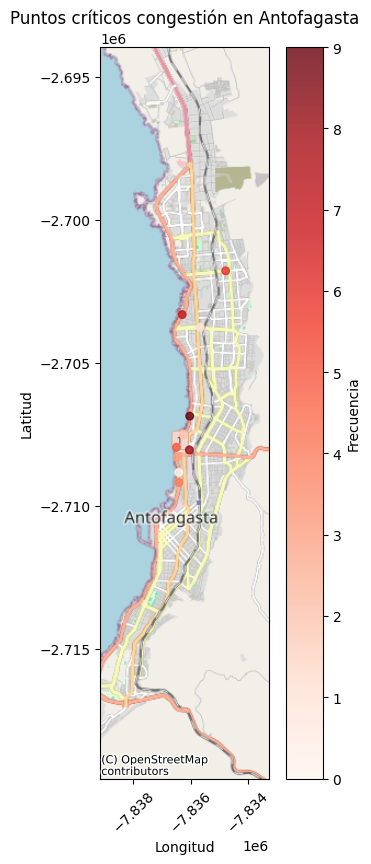

In [12]:
utils.plot_map(jams10, 'Puntos críticos congestión en Antofagasta', markersize=MARKERSIZE, cmap='Reds')

In [13]:
print('Las 10 coordenadas con más atascos son:')
for _, row in top10.iterrows():
    print(f'{row['y']}, {row['x']}')

Las 10 coordenadas con más atascos son:
-23.633673, -70.395696
-23.591899, -70.388978
-23.622785, -70.394325
-23.629337, -70.396247
-23.636586, -70.395669
-23.626434, -70.396441
-23.575661, -70.381019
-23.588255, -70.394657
-23.627195, -70.392389
-23.617475, -70.392283


In [14]:
hazards['freq'] = utils.freq_nearby(hazards)

In [15]:
hazards = hazards[utils.filter_nearby(hazards)]

top10 = hazards[['street', 'freq', 'x', 'y', 'geometry']].sort_values('freq', ascending=False).head(10)
hazards10 = top10.copy()
top10

,street,freq,x,y,geometry
1252,Av. Séptimo de Línea,54,-70.396722,-23.641780,POINT (-7836527.247 -2709817.801)
16,Av. Balmaceda,46,-70.400621,-23.646371,POINT (-7836961.281 -2710375.702)
339,Av. Edmundo Pérez Zujovic,43,-70.396370,-23.629201,POINT (-7836488.062 -2708289.293)
66,Av. Balmaceda,36,-70.397701,-23.643416,POINT (-7836636.228 -2710016.606)
31,Av. Antonio Rendic,34,-70.389409,-23.628164,POINT (-7835713.167 -2708163.291)
70,Av. Edmundo Pérez Zujovic,31,-70.396328,-23.627198,POINT (-7836483.387 -2708045.917)
134,Av. Edmundo Pérez Zujovic,30,-70.396215,-23.590976,POINT (-7836470.808 -2703645.373)
121,14 de Febrero,28,-70.393211,-23.650246,POINT (-7836136.404 -2710846.609)
286,Av. Séptimo de Línea,26,-70.395866,-23.639036,POINT (-7836431.957 -2709484.357)
229,Av. Grecia,25,-70.402526,-23.652546,POINT (-7837173.345 -2711126.122)


(<Figure size 450x950 with 2 Axes>,
 <Axes: title={'center': 'Puntos críticos peligros en Antofagasta'}, xlabel='Longitud', ylabel='Latitud'>)

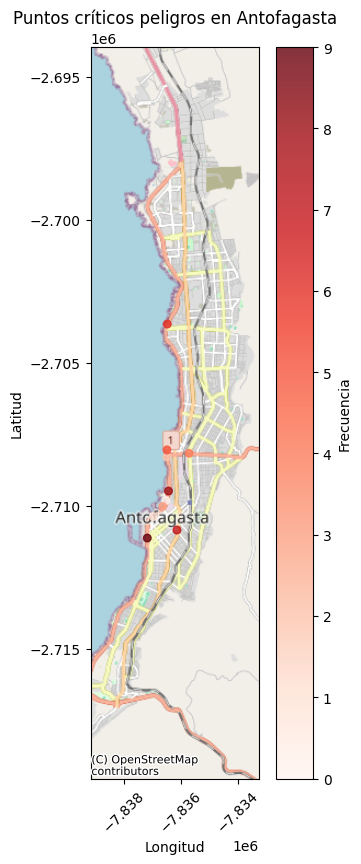

In [16]:
utils.plot_map(hazards10, 'Puntos críticos peligros en Antofagasta', markersize=MARKERSIZE, cmap='Reds')

In [17]:
print('Las 10 coordenadas con más peligros son:')
for _, row in top10.iterrows():
    print(f'{row['y']}, {row['x']}')

Las 10 coordenadas con más peligros son:
-23.64178, -70.396722
-23.646371, -70.400621
-23.629201, -70.39637
-23.643416, -70.397701
-23.628164, -70.389409
-23.627198, -70.396328
-23.590976, -70.396215
-23.650246, -70.393211
-23.639036, -70.395866
-23.652546, -70.402526
